# 데이터 전처리

**목차**
- 데이터 불러오기 및, null 데이터 제거, 20대만 추출
   - 학습 데이터셋 만들고 저장 
- session별 dialog 개수 시각화
- session 별 모든 dialog를 하나로 이었을 때의 string 길이 시각화
- session 별 모든 dialog를 하나로 이은 후, et5-base의 tokenizer를 이용해 토큰화 했을 때의 token 개수 시각화
    - 세션 별 페르소나 token 길이 분포

- session1와 session2를 합치고, [gogamza/kobart-base-v2](https://huggingface.co/gogamza/kobart-base-v2)의 tokenizer를 이용해 토큰화 했을 때의 token 개수 확인
    - dialoge를 모두 concat한 입력을 tokenizing하였을 경우에 대한 token 개수
    - persona를 모두 concat한 입력을 tokenizing하였을 경우에 대한 token 개수

## 데이터 불러오기 및, null 데이터 제거, 20대만 추출

In [1]:
# 데이터 불러오기
import pandas as pd
import numpy as np

tl_session2 = pd.read_csv('./data/train/tl_session2.csv')
tl_session2.head()

,id,topic,gender,age,occupation,num_session,init_persona,final_persona,session_1_dialog,session_1_persona,session_2_dialog,session_2_persona
0,K5-03991-CL74320-CP03664-02-08-S2.json,주거와 생활,남성,30대,기능직,2,"['나는 남자이다.', '나는 40대이다.', '나의 가족은 3명이다.', '나는 ...","['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을...","['안녕하세요? 저는 40대 남자입니다.', '그렇군요. 지금 뭐하고 계세요? 오늘...","['나는 남자이다. 나는 40대이다.', '나는 추운 날씨를 좋아한다. 나는 겨울을...","['안녕하세요? 제가 어제 다시 연락 드린다는게 늦었네요.', '죄송해요. 제가 연...","['나는 연락하는 것을 까먹었다.', '나는 곧 이사를 가야한다.', '현재 내가 ..."
1,K5-03991-CL74320-CP03664-02-08-S2.json,주거와 생활,남성,30대,사무직,2,"['나는 남자이다.', '나는 40대이다.', '나의 종교는 불교이다.', '나는 ...","['나는 남자이다. 나는 40대이다. 나의 종교는 불교이다.', '나는 짠 음식을 ...","['안녕하세요? 저는 40대 남자입니다. 제 종교는 불교에요.', '저랑 비슷하시네...","['나는 남자이다. 나는 40대이다. 나의 종교는 불교이다.', '나는 짠 음식을 ...","['어제 다시 연락주실 줄 알았는데 연락이 안오더라고요.', '아니에요. 그럴 수 ...",[]
2,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,무직,2,"['나는 여자이다.', '나는 20대이다.', '나는 아메리카노를 자주 마신다.',...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['반가워요~~ 저는 20대 여자입니다. 저는 아메리카노를 자주 마셔요.', '오 ...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['안녕하세요. 며칠간 일은 잘 하고 계셨죠?', '좋네요. 저는 일렉기타 연주 가...","['나는 일렉기타 연주를 가끔 한다.', '나는 요즘 단풍에 대해서 관심을 갖고 공..."
3,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,학생,2,"['나는 여자이다.', '나는 20대이다.', '나는 매우 조용하다.', '나는 도...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 반갑습니다. 저는 20대 여자이고요. 도서관 사서로 일하고 있어요.', '아...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 네 안녕하세요. 잘 지냈습니다.', '아 일렉 기타 하시는 구나 저도 악기를...","['나는 트럼펫 연주를 배운다.', '나는 상대 덕분에 새로운 사실을 알았다.']"
4,K5-03995-CL74539-CP32098-15-04-S2.json,시사/사회>타국가이슈(해외),남성,30대,사무직,2,"['나는 남자이다.', '나는 30대이다.', '나는 건축학과를 전공했다.', '나...","['나는 30대 남자이다.', '나는 건축학과를 전공해서 건설회사에 근무 중이다.'...","['안녕하세요. 반갑습니다. 저는 30대 남자예요.', '저는 건축학과를 전공해서 ...","['나는 30대 남자이다.', '나는 건축학과를 전공해서 건설회사에 근무 중이다.'...",['안녕하세요. 6일 만에 연락드리네요. 저는 이번에 벼르다 벼르다 코로나백신 4차...,"['나는 요즘 백신에 대해서 관심을 갖고 공부한다.', '우리나라도 실외에서 마스크..."


In [2]:
# session_1_dialog, session_1_persona, session_2_dialog, session_2_dialog에서 리스트의 길이가 0인 경우를 제외하고 데이터를 추출
print(len(tl_session2))
tl_session2_ = tl_session2[tl_session2['session_1_dialog'].apply(lambda x: len(eval(x)) > 0)]
print(len(tl_session2_))
tl_session2_ = tl_session2_[tl_session2_['session_1_persona'].apply(lambda x: len(eval(x)) > 0)]
print(len(tl_session2_))
tl_session2_ = tl_session2_[tl_session2_['session_2_dialog'].apply(lambda x: len(eval(x)) > 0)]
print(len(tl_session2_))
tl_session2_ = tl_session2_[tl_session2_['session_2_persona'].apply(lambda x: len(eval(x)) > 0)]

72000
72000
71981
71981


In [3]:
# 나이대별 분포
tl_session2_.groupby('age')['id'].count()

age
10대         811
20대       20658
30대       31757
40대        8200
50대        6112
60대 이상     1188
60대이상         2
Name: id, dtype: int64

In [4]:
# 20대만 추출
tl_session2_age20 = tl_session2_[tl_session2_['age'] == '20대']
print(len(tl_session2_age20))

20658


In [6]:
from copy import deepcopy

tl_session2_age20 = deepcopy(tl_session2_age20)

### 학습 데이터셋 만들기

In [5]:
tl_session2_age20

,id,topic,gender,age,occupation,num_session,init_persona,final_persona,session_1_dialog,session_1_persona,session_2_dialog,session_2_persona
2,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,무직,2,"['나는 여자이다.', '나는 20대이다.', '나는 아메리카노를 자주 마신다.',...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['반가워요~~ 저는 20대 여자입니다. 저는 아메리카노를 자주 마셔요.', '오 ...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어...","['안녕하세요. 며칠간 일은 잘 하고 계셨죠?', '좋네요. 저는 일렉기타 연주 가...","['나는 일렉기타 연주를 가끔 한다.', '나는 요즘 단풍에 대해서 관심을 갖고 공..."
3,K5-03984-CL74442-CP22286-13-04-S2.json,기후>계절/날씨,여성,20대,학생,2,"['나는 여자이다.', '나는 20대이다.', '나는 매우 조용하다.', '나는 도...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 반갑습니다. 저는 20대 여자이고요. 도서관 사서로 일하고 있어요.', '아...",['나는 20대 여자이다. 나는 도서관 사서이다.'],"['아 네 안녕하세요. 잘 지냈습니다.', '아 일렉 기타 하시는 구나 저도 악기를...","['나는 트럼펫 연주를 배운다.', '나는 상대 덕분에 새로운 사실을 알았다.']"
8,K5-03994-CL74403-CP11608-13-05-S2.json,기후>계절/날씨,여성,20대,서비스직,2,"['나는 여자이다.', '나는 10대이다.', '내가 사는 곳은 부천이다.', '나...","['나는 10대 여성이다. 내가 사는 곳은 부천이다.', '나는 요즘 즐겁다. 나는...","['안녕하세요! 저는 부천에 사는 10대 여자입니다!', '만나서 반가워요 ㅎㅎ 같...","['나는 10대 여성이다. 내가 사는 곳은 부천이다.', '나는 요즘 즐겁다. 나는...","['2주만에 연락 드리네요~! 그동안 잘 지내셨어요?', '저는 그동안 피아노 학원...","['나는 그간 피아노 학원을 다녔다.', '나는 오늘 피크닉을 갈 것이다.', '나..."
9,K5-03994-CL74403-CP11608-13-05-S2.json,기후>계절/날씨,여성,20대,서비스직,2,"['나는 여자이다.', '나는 10대이다.', '나는 아버지와 진학 문제로 갈등이 ...","['나는 10대 여자이다.', '나는 진학문제 때문에 고민이다. 나는 진학문제로 아...","['반가워요! ㅎㅎ 저도 10대 여성이에요!', '저는 요즘 진학 문제때문에 너무 ...","['나는 10대 여자이다.', '나는 진학문제 때문에 고민이다. 나는 진학문제로 아...","['네! ㅎㅎ 저는 잘 지내고 있어요! 님은 2주 동안 뭐하셨어요?', '저는 아버...","['나는 잘 지냈다.', '나는 아버지와 갈등을 해소했다. 나는 가족피크닉을 다녀왔..."
24,K5-03997-CL74070-CP11701-04-01-S2.json,일과 직업>회사/아르바이트,남성,20대,무직,2,"['나는 남자이다.', '나는 20대이다.', '나는 자기 주장이 강하다.', '나...","['나는 20대 남자이다.', '나는 자기주장이 강하다. 나는 전기정보공학부 부전공...","['반가워요 ㅋㅋ 저는20대 남성인데 그쪽은요??', 'ㅋㅋ 저는 지금 자기주장이 ...","['나는 20대 남자이다.', '나는 자기주장이 강하다. 나는 전기정보공학부 부전공...","['반갑습니다! ㅋㅋ 9일만에 다시 만나게 되었네요~ㅎㅎ.', 'ㅜㅜ저는 요즘 회사...","['나는 요즘 회사에서 짜증나는 일이 있다.', '나는 성격 때문에 상사랑 다퉜다...."
...,...,...,...,...,...,...,...,...,...,...,...,...
71995,K2-00002-CL21649-CP31111-08-09-S2.json,개인 및 관계>연애/결혼,남성,20대,학생,2,"['나는 남자이다.', '나는 30대이다.', '나는 중학교 영어 교사이다', '나...","['나는 30대 남성이다.', '나는 축구를 좋아해서 주말마다 축구동호회를 참석한다...","['안녕하세요 저는 30대 남성입니다.', '가을이 오긴 왔나보네요ㅎㅎ 아마 좋은 ...","['나는 30대 남성이다.', '나는 축구를 좋아해서 주말마다 축구동호회를 참석한다...",['네네 거의 한달만에 연락드리네요 저는 학생들이랑 수업하고 요즘 수행평가기간이라 ...,['나는 학생들 이과 수업하고 요즘 수행평가기간이라 아이들 수행평가를 지도해주면서 ...
71996,K2-00014-CL20283-CP21216-03-06-S2.json,교통,남성,20대,사무직,2,"['나는 남자이다.', '나는 20대이다.', '나의 거주지는 부산이다.', '나는...","['나는 20대 남자이다.', '나의 거주지는 부산이다.', '나는 모든 음식을 좋...","['안녕하세요. 제 소개를 하자면 저는 20대이구요, 남자에요!', '안녕하세요. ...","['나는 20대 남자이다.', '나의 거주지는 부산이다.', '나는 모든 음식을 좋...","['아니 하루뒤에나 연락드렸네요... 일이 좀 있었어요.', '아니 어제 장을 보러...","['나는 볼 일이 있었다.', '나는 차 사고가 났다.', '나는 난기류를 만났을 ..."
71997,K2-00014-CL20283-CP21216-03-06-S2.json,교통,남성,20대,교직,2,"['나는 남자이다.', '나는 20대이다.', '나는 종교가 없다.', '나는 비행...","['나는 20대 남자이다. 나는 종교가 없다.', '나는 인천에 산다.', '나는 ...","['반갑습니다. 종교 없고 아무것도 없는 깔끔한 20대 남성입니다.', '저는 인천...","['나는 20대 남자이다. 나는 종교가 없다.', '나는 인천에 산다.', '나는 ...","['무슨 일이신데요?', '네??? 그게 무슨 말씀인가요? 병원 가야하나요?', '...","['나는 비행기 트라우마가 있다. 나는 성인이 되고 나서 안 타봤다.', '나는 난..."
71998,K2-00020-CL13719-CP12624-03-09-S2.json,교통,여성,20대,학생,2,"['나는 여자이다.', '나는 10대이다.', '나는 동생과 게임하는 게 재미있다'...","['나는 10대 여성이다', '나는 외향적이고 혼자 있는 것을 좋아한다. 나는 방송...","['안녕하세요! 저는 10대 여성입니다!!', '와 저도요~ 성격은 외향적인 편이신...","['나는 10대 여성이다', '나는 외향적이고 혼자 있는 것을 좋아한다. 나는 방송...","['안녕하세요~ 2주만이네요~ 요즘도 요리 관련 동아리 활동 잘 하고 계신가요?',...","['나는 운전면허를 따고 싶다', '나는 대중교통에서 탈출하고 자가용을 이용하고 싶..."


In [28]:
# id, session_dialog, session_persona를 column으로 가지는 dataframe으로 변환
session_2_age_20 = pd.DataFrame(columns=['id', 'session_dialog', 'session_persona'])

# session_1_dialog, session_1_persona를 sesion_dialog, session_persona 위치에 concat
session_2_age_20 = pd.concat([session_2_age_20, tl_session2_age20[['id', 'session_1_dialog', 'session_1_persona']].rename(columns={'session_1_dialog': 'session_dialog', 'session_1_persona': 'session_persona'})])
session_2_age_20 = pd.concat([session_2_age_20, tl_session2_age20[['id', 'session_2_dialog', 'session_2_persona']].rename(columns={'session_2_dialog': 'session_dialog', 'session_2_persona': 'session_persona'})])

session_2_age_20

,id,session_dialog,session_persona
2,K5-03984-CL74442-CP22286-13-04-S2.json,"['반가워요~~ 저는 20대 여자입니다. 저는 아메리카노를 자주 마셔요.', '오 ...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어..."
3,K5-03984-CL74442-CP22286-13-04-S2.json,"['아 반갑습니다. 저는 20대 여자이고요. 도서관 사서로 일하고 있어요.', '아...",['나는 20대 여자이다. 나는 도서관 사서이다.']
8,K5-03994-CL74403-CP11608-13-05-S2.json,"['안녕하세요! 저는 부천에 사는 10대 여자입니다!', '만나서 반가워요 ㅎㅎ 같...","['나는 10대 여성이다. 내가 사는 곳은 부천이다.', '나는 요즘 즐겁다. 나는..."
9,K5-03994-CL74403-CP11608-13-05-S2.json,"['반가워요! ㅎㅎ 저도 10대 여성이에요!', '저는 요즘 진학 문제때문에 너무 ...","['나는 10대 여자이다.', '나는 진학문제 때문에 고민이다. 나는 진학문제로 아..."
24,K5-03997-CL74070-CP11701-04-01-S2.json,"['반가워요 ㅋㅋ 저는20대 남성인데 그쪽은요??', 'ㅋㅋ 저는 지금 자기주장이 ...","['나는 20대 남자이다.', '나는 자기주장이 강하다. 나는 전기정보공학부 부전공..."
...,...,...,...
71995,K2-00002-CL21649-CP31111-08-09-S2.json,['네네 거의 한달만에 연락드리네요 저는 학생들이랑 수업하고 요즘 수행평가기간이라 ...,['나는 학생들 이과 수업하고 요즘 수행평가기간이라 아이들 수행평가를 지도해주면서 ...
71996,K2-00014-CL20283-CP21216-03-06-S2.json,"['아니 하루뒤에나 연락드렸네요... 일이 좀 있었어요.', '아니 어제 장을 보러...","['나는 볼 일이 있었다.', '나는 차 사고가 났다.', '나는 난기류를 만났을 ..."
71997,K2-00014-CL20283-CP21216-03-06-S2.json,"['무슨 일이신데요?', '네??? 그게 무슨 말씀인가요? 병원 가야하나요?', '...","['나는 비행기 트라우마가 있다. 나는 성인이 되고 나서 안 타봤다.', '나는 난..."
71998,K2-00020-CL13719-CP12624-03-09-S2.json,"['안녕하세요~ 2주만이네요~ 요즘도 요리 관련 동아리 활동 잘 하고 계신가요?',...","['나는 운전면허를 따고 싶다', '나는 대중교통에서 탈출하고 자가용을 이용하고 싶..."


In [30]:
# 저장
# session_2_age_20.to_csv('./data/train/session_2_age_20.csv', index=False)

In [34]:
# session_2_age_20을 8대 2로 나누어 train, validation으로 사용
# from sklearn.model_selection import train_test_split

# train, validation = train_test_split(session_2_age_20, test_size=0.2, random_state=42)

In [35]:
# 저장
# train.to_csv('./data/train/train.csv', index=False)
# validation.to_csv('./data/train/validation.csv', index=False)

## session별 dialog 개수 시각화

- **결과** : session별로 7-10개가 많이 존재 

In [1]:
# import pandas as pd
# import numpy as np

# tl_session2_age20 = pd.read_csv('./data/train/session_2_age_20.csv')

In [17]:
## 통계값
print('session_1_dialog')
print(tl_session2_age20['session_1_dialog'].apply(lambda x: len(eval(x))).describe())
print('\nsession_2_dialog')
print(tl_session2_age20['session_2_dialog'].apply(lambda x: len(eval(x))).describe())

session_1_dialog
count    20658.000000
mean         7.614532
std          0.757449
min          4.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         17.000000
Name: session_1_dialog, dtype: float64

session_2_dialog
count    20658.000000
mean         7.734292
std          0.978802
min          5.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         16.000000
Name: session_2_dialog, dtype: float64


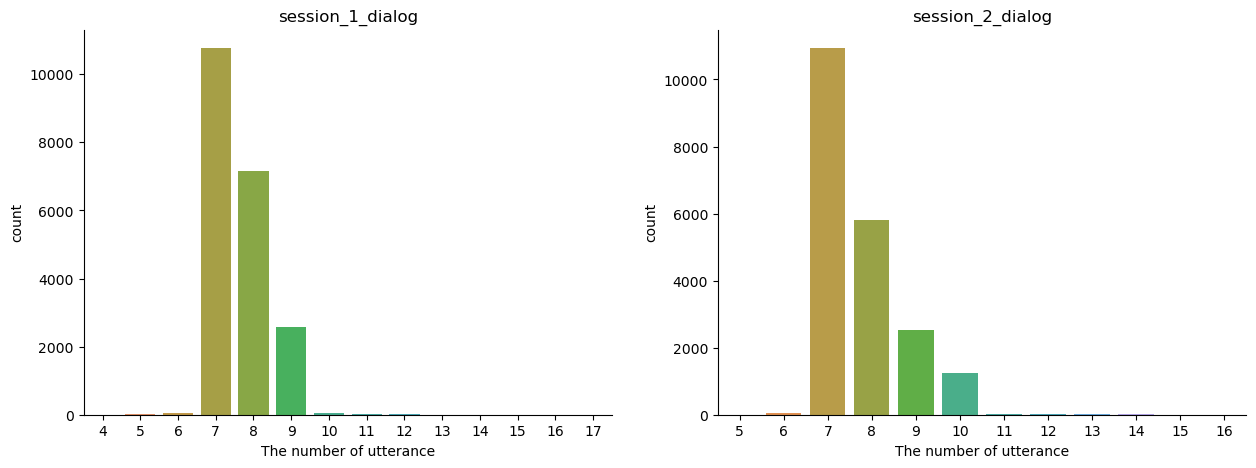

In [7]:
# session별 dialog 길이 시각화
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

seaborn.barplot(x=tl_session2_age20['session_1_dialog'].apply(lambda x: len(eval(x))).value_counts().index,
                y=tl_session2_age20['session_1_dialog'].apply(lambda x: len(eval(x))).value_counts().values,
                ax=ax[0])
ax[0].set_xlabel('The number of utterance')
ax[0].set_title('session_1_dialog')
ax[0].set_ylabel('count')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

seaborn.barplot(x=tl_session2_age20['session_2_dialog'].apply(lambda x: len(eval(x))).value_counts().index,
                y=tl_session2_age20['session_2_dialog'].apply(lambda x: len(eval(x))).value_counts().values,
                ax=ax[1])
ax[1].set_xlabel('The number of utterance')
ax[1].set_title('session_2_dialog')
ax[1].set_ylabel('count')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

## session 별 모든 dialog를 하나로 이었을 때의 string 길이 시각화

In [20]:
## 통계값
print('session_1_dialog')
print(tl_session2_age20['session_1_dialog'].apply(lambda x: len(' '.join(eval(x)))).describe())
print('\nsession_2_dialog')
print(tl_session2_age20['session_2_dialog'].apply(lambda x: len(' '.join(eval(x)))).describe())

session_1_dialog
count    20658.000000
mean       277.296011
std         68.971613
min        115.000000
25%        229.000000
50%        266.000000
75%        312.000000
max        926.000000
Name: session_1_dialog, dtype: float64

session_2_dialog
count    20658.000000
mean       296.345338
std         85.981149
min        138.000000
25%        239.000000
50%        282.000000
75%        335.000000
max       1889.000000
Name: session_2_dialog, dtype: float64


/home/donghae/anaconda3/envs/persona_extraction/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/donghae/anaconda3/envs/persona_extraction/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


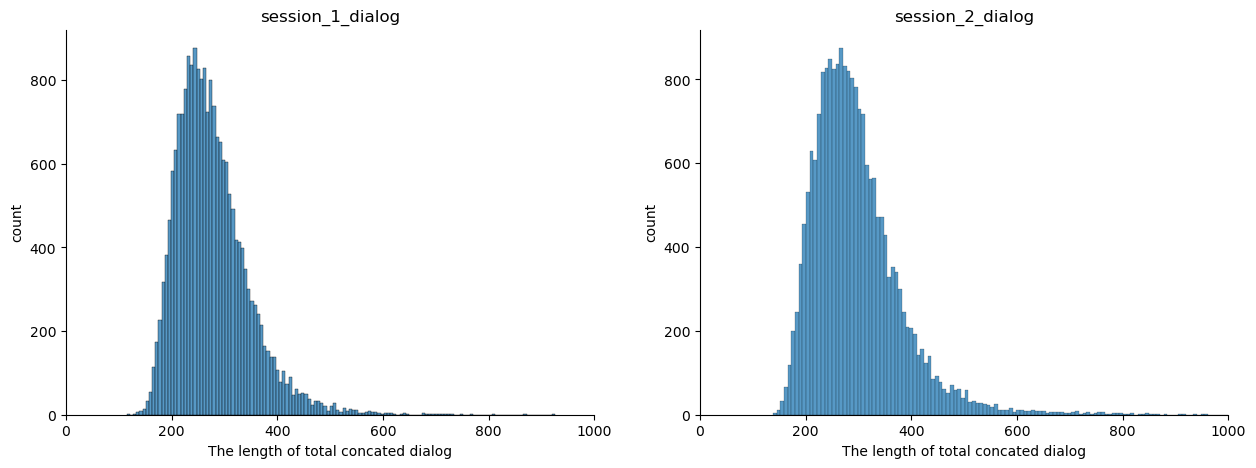

In [22]:
# session 별 모든 dialog를 하나로 이었을 때의 string 길이 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

seaborn.histplot(tl_session2_age20['session_1_dialog'].apply(lambda x: len(' '.join(eval(x)))), ax=ax[0])
ax[0].set_xlabel('The length of total concated dialog')
ax[0].set_title('session_1_dialog')
ax[0].set_ylabel('count')
ax[0].set_xlim(0, 1000)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

seaborn.histplot(tl_session2_age20['session_2_dialog'].apply(lambda x: len(' '.join(eval(x)))), ax=ax[1])
ax[1].set_xlabel('The length of total concated dialog')
ax[1].set_title('session_2_dialog')
ax[1].set_ylabel('count')
ax[1].set_xlim(0, 1000)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

## session 별 모든 dialog를 하나로 이은 후, et5-base의 tokenizer를 이용해 토큰화 했을 때의 token 개수 시각화

In [9]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained('et5-base')

/home/donghae/anaconda3/envs/persona_extraction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [25]:
## 통계값
print('session_1_dialog')
print(tl_session2_age20['session_1_dialog'].apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).describe())
print('\nsession_2_dialog')
print(tl_session2_age20['session_2_dialog'].apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).describe())

session_1_dialog
count    20658.000000
mean       118.712121
std         29.065746
min         43.000000
25%         99.000000
50%        115.000000
75%        133.000000
max        365.000000
Name: session_1_dialog, dtype: float64

session_2_dialog
count    20658.000000
mean       127.818085
std         36.241429
min         54.000000
25%        104.000000
50%        122.000000
75%        144.000000
max        826.000000
Name: session_2_dialog, dtype: float64


/home/donghae/anaconda3/envs/persona_extraction/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/donghae/anaconda3/envs/persona_extraction/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


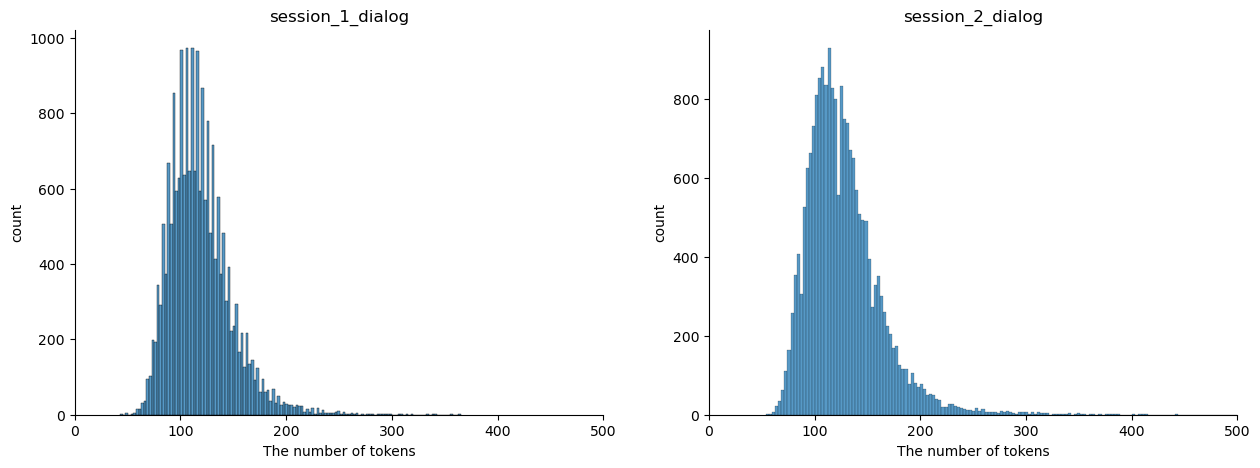

In [27]:
# session 별 모든 dialog를 하나로 이은 후, et5-base의 tokenizer를 이용해 토큰화 했을 때의 token 개수 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

seaborn.histplot(tl_session2_age20['session_1_dialog'].apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))), ax=ax[0])
ax[0].set_xlabel('The number of tokens')
ax[0].set_title('session_1_dialog')
ax[0].set_ylabel('count')
ax[0].set_xlim(0, 500)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

seaborn.histplot(tl_session2_age20['session_2_dialog'].apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))), ax=ax[1])
ax[1].set_xlabel('The number of tokens')
ax[1].set_title('session_2_dialog')
ax[1].set_ylabel('count')
ax[1].set_xlim(0, 500)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

### 세션 별 페르소나 token 길이 분포

In [23]:
## 통계값
print('session_1_persona')
print(tl_session2_age20['session_1_persona'].apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).describe())
print('\nsession_2_persona')
print(tl_session2_age20['session_2_persona'].apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).describe())

session_1_persona
count    20658.000000
mean        49.386533
std         20.716477
min          6.000000
25%         35.000000
50%         47.000000
75%         61.000000
max        171.000000
Name: session_1_persona, dtype: float64

session_2_persona
count    20658.000000
mean        38.817891
std         24.832033
min          2.000000
25%         20.000000
50%         34.000000
75%         52.000000
max        206.000000
Name: session_2_persona, dtype: float64


## session1와 session2를 합치고, 모든 dialog를 하나로 이은 후, [gogamza/kobart-base-v2](https://huggingface.co/gogamza/kobart-base-v2)의 tokenizer를 이용해 토큰화 했을 때의 token 개수 확인

In [11]:
import pandas as pd
from tqdm import tqdm
import numpy as np

tl_session2_age20 = pd.read_csv('./data/train/session_2_age_20.csv')

In [9]:
tl_session2_age20

,id,session_dialog,session_persona
0,K5-03984-CL74442-CP22286-13-04-S2.json,"['반가워요~~ 저는 20대 여자입니다. 저는 아메리카노를 자주 마셔요.', '오 ...","['나는 20대 여자이다. 나는 아메리카노를 자주 마신다.', '나는 뉴질랜드로 어..."
1,K5-03984-CL74442-CP22286-13-04-S2.json,"['아 반갑습니다. 저는 20대 여자이고요. 도서관 사서로 일하고 있어요.', '아...",['나는 20대 여자이다. 나는 도서관 사서이다.']
2,K5-03994-CL74403-CP11608-13-05-S2.json,"['안녕하세요! 저는 부천에 사는 10대 여자입니다!', '만나서 반가워요 ㅎㅎ 같...","['나는 10대 여성이다. 내가 사는 곳은 부천이다.', '나는 요즘 즐겁다. 나는..."
3,K5-03994-CL74403-CP11608-13-05-S2.json,"['반가워요! ㅎㅎ 저도 10대 여성이에요!', '저는 요즘 진학 문제때문에 너무 ...","['나는 10대 여자이다.', '나는 진학문제 때문에 고민이다. 나는 진학문제로 아..."
4,K5-03997-CL74070-CP11701-04-01-S2.json,"['반가워요 ㅋㅋ 저는20대 남성인데 그쪽은요??', 'ㅋㅋ 저는 지금 자기주장이 ...","['나는 20대 남자이다.', '나는 자기주장이 강하다. 나는 전기정보공학부 부전공..."
...,...,...,...
41311,K2-00002-CL21649-CP31111-08-09-S2.json,['네네 거의 한달만에 연락드리네요 저는 학생들이랑 수업하고 요즘 수행평가기간이라 ...,['나는 학생들 이과 수업하고 요즘 수행평가기간이라 아이들 수행평가를 지도해주면서 ...
41312,K2-00014-CL20283-CP21216-03-06-S2.json,"['아니 하루뒤에나 연락드렸네요... 일이 좀 있었어요.', '아니 어제 장을 보러...","['나는 볼 일이 있었다.', '나는 차 사고가 났다.', '나는 난기류를 만났을 ..."
41313,K2-00014-CL20283-CP21216-03-06-S2.json,"['무슨 일이신데요?', '네??? 그게 무슨 말씀인가요? 병원 가야하나요?', '...","['나는 비행기 트라우마가 있다. 나는 성인이 되고 나서 안 타봤다.', '나는 난..."
41314,K2-00020-CL13719-CP12624-03-09-S2.json,"['안녕하세요~ 2주만이네요~ 요즘도 요리 관련 동아리 활동 잘 하고 계신가요?',...","['나는 운전면허를 따고 싶다', '나는 대중교통에서 탈출하고 자가용을 이용하고 싶..."


In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('gogamza/kobart-base-v2')

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [4]:
tokenizer.special_tokens_map

{'bos_token': '</s>',
 'eos_token': '</s>',
 'unk_token': '<unk>',
 'pad_token': '<pad>',
 'mask_token': '<mask>'}

In [12]:
## 통계갑
tqdm.pandas()

print('session_dialog')
print(tl_session2_age20['session_dialog'].progress_apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).describe())
print('session_dialog, 상위 95% percentile:', tl_session2_age20['session_dialog'].progress_apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).quantile(0.95))
print('\nsession_persona')
print(tl_session2_age20['session_persona'].progress_apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).describe())
print('session_persona, 상위 95% percentile:', tl_session2_age20['session_persona'].progress_apply(lambda x: len(tokenizer.encode(' '.join(eval(x))))).quantile(0.95))

session_dialog


100%|██████████| 41316/41316 [00:20<00:00, 2033.56it/s]


count    41316.000000
mean       138.371285
std         38.842741
min         53.000000
25%        112.000000
50%        132.000000
75%        157.000000
max        950.000000
Name: session_dialog, dtype: float64


100%|██████████| 41316/41316 [00:22<00:00, 1831.17it/s]


session_dialog, 상위 95% percentile: 207.0

session_persona


100%|██████████| 41316/41316 [00:09<00:00, 4560.97it/s]


count    41316.000000
mean        37.095242
std         21.786086
min          1.000000
25%         22.000000
50%         33.000000
75%         49.000000
max        202.000000
Name: session_persona, dtype: float64


100%|██████████| 41316/41316 [00:10<00:00, 4047.92it/s]

session_persona, 상위 95% percentile: 77.0
